# NYC Restaurant Grade Analysis

To get a good understanding of the NYC restaurant grades dataset, I looked at the data from two perspectives: Customer and Inspector.

### Customer Perspective
From Customer perspective, I tried to answer the following questions in mind.

1. Borough with most number of restaurants
2. Most popular Cuisines across boroughs
3. Percent of grade A, grade B, grade C restaurants in different boroughs

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# read the datasets
borough = pd.read_table('borough_names.tsv')
cuisine = pd.read_table('cuisine_names.tsv')
restaurant_name = pd.read_table('restaurant_names.tsv')
restaurant_attribute = pd.read_table('restaurant_attributes.tsv')
restaurant_violation = pd.read_table('restaurant_violations.tsv')
violations = pd.read_table('violation_names.tsv')


## Which borough has the most number of restaurants.

In [11]:

borough_restCount=restaurant_attribute['borough_id'].value_counts()
borough_restCount_df=pd.DataFrame({'id':borough_restCount.index, 'restCount':borough_restCount.values})

borough_restCount_each=pd.merge(borough_restCount_df,borough, how = 'inner', on = 'id')
borough_restCount_each[['id', 'borough_name', 'restCount']]


,id,borough_name,restCount
0,3,MANHATTAN,9964
1,2,BROOKLYN,6037
2,4,QUEENS,5618
3,1,BRONX,2271
4,5,STATEN ISLAND,910


[<matplotlib.text.Text at 0x1183c9e8>, <matplotlib.text.Text at 0x11958f28>]

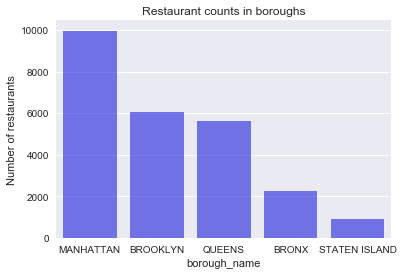

In [7]:
sns.barplot(x='borough_name', y='restCount', data=borough_restCount_each, color='blue', alpha=0.6).set(ylabel='Number of restaurants', title='Restaurant counts in boroughs')

## Observations: 
Manhattan has the most number of restaurants, followed by Brooklyn, Queens, Bronx and Staten Island

## Top 5 popular cuisines in different boroughs

### Manhattan

In [33]:
# Top 5 popular cuisines in Manhattan

top5cuisines_manhattan=restaurant_attribute[restaurant_attribute['borough_id']==3]['cuisine_id'].value_counts().head(5)
top5cuisines_manhattan_df = pd.DataFrame({'id': top5cuisines_manhattan.index, 'cuisine_count':top5cuisines_manhattan.values})

pd.merge(top5cuisines_manhattan_df,cuisine,how='inner', on ='id')


,cuisine_count,id,cuisine_description
0,3086,3,American
1,820,13,CafÃ©/Coffee/Tea
2,596,46,Italian
3,486,19,Chinese
4,459,47,Japanese


### Brooklyn

In [34]:
# Top 5 popular cuisines in Brooklyn

top5cuisines_brooklyn=restaurant_attribute[restaurant_attribute['borough_id']==2]['cuisine_id'].value_counts().head(5)
top5cuisines_brooklyn_df = pd.DataFrame({'id': top5cuisines_brooklyn.index, 'cuisine_count':top5cuisines_brooklyn.values})

pd.merge(top5cuisines_brooklyn_df, cuisine, how= 'inner', on = 'id')


,cuisine_count,id,cuisine_description
0,1264,3,American
1,734,19,Chinese
2,386,13,CafÃ©/Coffee/Tea
3,317,16,Caribbean
4,297,62,Pizza


### Queens

In [14]:
# Top 5 popular cuisines in Queens

top5cuisines_queens=restaurant_attribute[restaurant_attribute['borough_id']==4]['cuisine_id'].value_counts().head(5)
top5cuisines_queens_df = pd.DataFrame({'id': top5cuisines_queens.index, 'cuisine_count':top5cuisines_queens.values})

pd.merge(top5cuisines_queens_df, cuisine, how= 'inner', on = 'id')

,cuisine_count,id,cuisine_description
0,1013,3,American
1,734,19,Chinese
2,316,51,"Latin (Cuban, Dominican, Puerto Rican, South &..."
3,280,62,Pizza
4,224,13,CafÃ©/Coffee/Tea


### Bronx

In [15]:
# Top 5 popular cuisines in Bronx

top5cuisines_bronx=restaurant_attribute[restaurant_attribute['borough_id']==1]['cuisine_id'].value_counts().head(5)
top5cuisines_bronx_df = pd.DataFrame({'id': top5cuisines_bronx.index, 'cuisine_count':top5cuisines_bronx.values})

pd.merge(top5cuisines_bronx_df, cuisine, how= 'inner', on = 'id')

,cuisine_count,id,cuisine_description
0,425,3,American
1,310,19,Chinese
2,189,62,Pizza
3,178,51,"Latin (Cuban, Dominican, Puerto Rican, South &..."
4,137,77,Spanish


### Staten Island

In [45]:
# Top 5 popular cuisines in Staten Island

top5cuisines_staten=restaurant_attribute[restaurant_attribute['borough_id']==5]['cuisine_id'].value_counts().head(5)
top5cuisines_staten_df = pd.DataFrame({'id': top5cuisines_staten.index, 'cuisine_count':top5cuisines_staten.values})

pd.merge(top5cuisines_staten_df, cuisine, how= 'inner', on = 'id')

,cuisine_count,id,cuisine_description
0,226,3,American
1,79,19,Chinese
2,72,46,Italian
3,65,63,Pizza/Italian
4,53,62,Pizza


## Observation :
1. American is the most popular cuisine in all the boroughs
2. Chinese is the second most preferred cuisine in most of the boroughs. 

##  Percent of grade A, grade B, grade C restaurants in different boroughs

In [267]:
# % of A,B,C grade restaurants in different boroughs


rest_df=pd.merge(restaurant_violation, restaurant_attribute, how ='inner', on ='restaurant_id')
rest_df = rest_df[['grade', 'borough_id']]

# grade A,B,C restaurants in Borough 1 

totalrest_1=rest_df[rest_df['borough_id']==1]['borough_id'].value_counts()
gradeArest_1=sum((rest_df['borough_id']==1) & (rest_df['grade']=='A'))
gradeBrest_1=sum((rest_df['borough_id']==1) & (rest_df['grade']=='B'))
gradeCrest_1=sum((rest_df['borough_id']==1) & (rest_df['grade']=='C'))

perc_gradeABCrest_1=pd.DataFrame({'id':1,'total_restCount': totalrest_1.values, 'gradeA_restCount': gradeArest_1, 'gradeB_restCount':gradeBrest_1, 'gradeC_restCount':gradeCrest_1})


# grade A,B,C restaurants in Borough 2

totalrest_2=rest_df[rest_df['borough_id']==2]['borough_id'].value_counts()
gradeArest_2=sum((rest_df['borough_id']==2) & (rest_df['grade']=='A'))
gradeBrest_2=sum((rest_df['borough_id']==2) & (rest_df['grade']=='B'))
gradeCrest_2=sum((rest_df['borough_id']==2) & (rest_df['grade']=='C'))

perc_gradeABCrest_2=pd.DataFrame({'id':2,'total_restCount': totalrest_2.values, 'gradeA_restCount': gradeArest_2, 'gradeB_restCount':gradeBrest_2, 'gradeC_restCount':gradeCrest_2})


# grade A,B,C restaurants in Borough 3

totalrest_3=rest_df[rest_df['borough_id']==3]['borough_id'].value_counts()
gradeArest_3=sum((rest_df['borough_id']==3) & (rest_df['grade']=='A'))
gradeBrest_3=sum((rest_df['borough_id']==3) & (rest_df['grade']=='B'))
gradeCrest_3=sum((rest_df['borough_id']==3) & (rest_df['grade']=='C'))

perc_gradeABCrest_3=pd.DataFrame({'id':3,'total_restCount': totalrest_3.values, 'gradeA_restCount': gradeArest_3, 'gradeB_restCount':gradeBrest_3, 'gradeC_restCount':gradeCrest_3})


# grade A,B,C restaurants in Borough 4

totalrest_4=rest_df[rest_df['borough_id']==4]['borough_id'].value_counts()
gradeArest_4=sum((rest_df['borough_id']==4) & (rest_df['grade']=='A'))
gradeBrest_4=sum((rest_df['borough_id']==4) & (rest_df['grade']=='B'))
gradeCrest_4=sum((rest_df['borough_id']==4) & (rest_df['grade']=='C'))

perc_gradeABCrest_4=pd.DataFrame({'id':4,'total_restCount': totalrest_4.values, 'gradeA_restCount': gradeArest_4, 'gradeB_restCount':gradeBrest_4, 'gradeC_restCount':gradeCrest_4})

# grade A,B,C restaurants in Borough 5

totalrest_5=rest_df[rest_df['borough_id']==5]['borough_id'].value_counts()
gradeArest_5=sum((rest_df['borough_id']==5) & (rest_df['grade']=='A'))
gradeBrest_5=sum((rest_df['borough_id']==5) & (rest_df['grade']=='B'))
gradeCrest_5=sum((rest_df['borough_id']==5) & (rest_df['grade']=='C'))

perc_gradeABCrest_5=pd.DataFrame({'id':5,'total_restCount': totalrest_5.values, 'gradeA_restCount': gradeArest_5, 'gradeB_restCount':gradeBrest_5, 'gradeC_restCount':gradeCrest_5})

# grade A,B,C restaurants in all boroughs
perc_gradeABC_rest=pd.concat([perc_gradeABCrest_1, perc_gradeABCrest_2, perc_gradeABCrest_3, perc_gradeABCrest_4, perc_gradeABCrest_5])
perc_gradeABC_rest['%gradeA_rest']=perc_gradeABC_rest['gradeA_restCount']/perc_gradeABC_rest['total_restCount']
perc_gradeABC_rest['%gradeB_rest']=perc_gradeABC_rest['gradeB_restCount']/perc_gradeABC_rest['total_restCount']
perc_gradeABC_rest['%gradeC_rest']=perc_gradeABC_rest['gradeC_restCount']/perc_gradeABC_rest['total_restCount']

perc_gradeABC_rest=pd.merge(perc_gradeABC_rest, borough, how ='inner', on ='id')
perc_gradeABC_rest[['borough_name', '%gradeA_rest', '%gradeB_rest', '%gradeC_rest']]


,borough_name,%gradeA_rest,%gradeB_rest,%gradeC_rest
0,BRONX,0.771864,0.165084,0.039524
1,BROOKLYN,0.789427,0.154326,0.037115
2,MANHATTAN,0.797636,0.146777,0.038717
3,QUEENS,0.789924,0.153998,0.038134
4,STATEN ISLAND,0.802031,0.147904,0.035474


 ### Inspector Perspective
 Next, from an Inspector’s perspective, I tried to find the answers to the following questions:
 
 1. What are the top five violations in the restaurants?
 2. Top five restauants with most number of violations?
 3. What cuisine does the restaurant with maximum number of violations offer?
 4. Percent of critical violations in different grade restaurants
 5. Most common violation in grade A, grade B, grade C restuarant.

## Top five violations in the restaurants.

In [62]:
# Top 5 violations

top5violations = restaurant_violation['violation_id'].value_counts().head()
top5violations_df = pd.DataFrame({'id': top5violations.index, 'count':top5violations.values})
top5violations_df

pd.merge(top5violations_df, violations, how='inner', on = 'id')

,count,id,violation_description
0,40624,44,Non-food contact surface improperly constructe...
1,17997,15,Facility not vermin proof. Harborage or condit...
2,15316,20,"Food contact surface not properly washed, rins..."
3,14889,25,Food not protected from potential source of co...
4,13832,47,Plumbing not properly installed or maintained;...


## Observation:
'Improper construction of non food surface' is the most common type of violation amongst restaurants

## Top five restaurants with most number of violations

In [79]:
# Top 5 restaurant with most number of violations

top5restaurant_maxviolations = restaurant_violation['restaurant_id'].value_counts().head()
top5restaurant_maxviolations_df = pd.DataFrame({'id': top5restaurant_maxviolations.index , 'violations_count': top5restaurant_maxviolations.values})
top5restaurant_maxviolations_restaurantName = pd.merge(top5restaurant_maxviolations_df, restaurant_name, how = 'inner', on = 'id')
top5restaurant_maxviolations_restaurantName

,id,violations_count,restaurant_name
0,54afd66dfc522ad9c6ba84cce7bf5b6f,47,GANG SAN DEUL
1,792bfc52116fd589a25fdd154f94d3ca,36,LA ISLA CAFE RESTAURANT
2,1c6653470ac500c30f5e1784f8799bb0,36,EXPRESS BROOK LUNCH RESTAURANT
3,06fd18c515e04943cf116d3257a4f718,35,DOJO RESTAURANT
4,b148d5234ec0c378e43a7e1d5e579688,35,SHERATON NEW YORK HOTEL & TOWERS


## What cuisine does the restaurant with maximum number of violations offer?

In [95]:
# What cuisine does the restaurant with maximum number of violations offer?

top5restaurant_maxviolations_restaurantName = top5restaurant_maxviolations_restaurantName.rename(columns={'id':'restaurant_id'})
top5restaurant_maxviolations_cuisine = pd.merge(top5restaurant_maxviolations_restaurantName, restaurant_attribute, how ='inner', on ='restaurant_id')
top5restaurant_maxviolations_cuisine=top5restaurant_maxviolations_cuisine[['restaurant_id','restaurant_name', 'violations_count', 'borough_id', 'cuisine_id']]

cuisine = cuisine.rename(columns={'id':'cuisine_id'})

pd.merge(top5restaurant_maxviolations_cuisine, cuisine, how ='inner', on ='cuisine_id')

,restaurant_id,restaurant_name,violations_count,borough_id,cuisine_id,cuisine_description
0,54afd66dfc522ad9c6ba84cce7bf5b6f,GANG SAN DEUL,47,4,50,Korean
1,792bfc52116fd589a25fdd154f94d3ca,LA ISLA CAFE RESTAURANT,36,3,51,"Latin (Cuban, Dominican, Puerto Rican, South &..."
2,1c6653470ac500c30f5e1784f8799bb0,EXPRESS BROOK LUNCH RESTAURANT,36,1,77,Spanish
3,06fd18c515e04943cf116d3257a4f718,DOJO RESTAURANT,35,3,47,Japanese
4,b148d5234ec0c378e43a7e1d5e579688,SHERATON NEW YORK HOTEL & TOWERS,35,3,3,American


## Observation:
Korean restaurant 'Gang San Deul' in Queens borough has the maximum number of violations

TODO: It is observed that same restaurant names may have different restaurant Ids and 
    hence the maximum number of violations appears different if only one is taken  into account. 
    As of now restaurant ID has been taken into consideration but we can consider both for better results.
    

## Percentage of critical violations in different grade restaurants

In [137]:
# Critical violations in different graded restaurants

restgrade_totalviolations= restaurant_violation.groupby(by ='grade').violation_id.count()
restgrade_criticalviolations = restaurant_violation[restaurant_violation['critical_flag']=='Critical'].groupby(by = 'grade').critical_flag.count()
restgrade_criticalviolations_df=pd.DataFrame({'grade': restgrade_criticalviolations.index, 'critical_violationcount': restgrade_criticalviolations.values})
#restgrade_criticalviolations_df[['grade', 'cv_count']]
restgrade_totalviolations_df = pd.DataFrame({'grade': restgrade_totalviolations.index, 'total_violationcount': restgrade_totalviolations.values})
restgrade_totalviolations_df

restgrade_viol=pd.merge(restgrade_criticalviolations_df, restgrade_totalviolations_df, how ='inner', on ='grade')
restgrade_viol=restgrade_viol[['grade', 'critical_violationcount', 'total_violationcount']]
restgrade_viol['percentviolation']=(restgrade_viol['critical_violationcount']/restgrade_viol['total_violationcount'])*100

,grade,critical_violationcount,total_violationcount,percentviolation
0,A,77584,160117,48.454568
1,B,20952,30738,68.163186
2,C,5201,7717,67.396657
3,G,4,6,66.666667
4,Not Yet Graded,2,8,25.000000
5,P,330,1367,24.140454
6,Z,1408,2298,61.270670


## Observation:
Grade B restaurants have the highest percentage of critical violations. 

## Most common violations in A, B, C grade restaurants

In [172]:
# Most common violation in A, B, C grade restaurants

# Most common violation in A grade restaurant
gradeArest_violation=restaurant_violation[restaurant_violation['grade']=='A']['violation_id'].value_counts().head(1)
gradeArest_violation_df = pd.DataFrame({'id':gradeArest_violation.index, 'count':gradeArest_violation.values})

gradeArest_violation_top=pd.merge(gradeArest_violation_df, violations, how='inner', on ='id')
gradeArest_violation_top.rename(columns={'id':'violation_id'}, inplace=True)
gradeArest_violation_top['grade']='A'

# Most common violation in B grade restaurant
gradeBrest_violation=restaurant_violation[restaurant_violation['grade']=='B']['violation_id'].value_counts().head(1)
gradeBrest_violation_df = pd.DataFrame({'id':gradeBrest_violation.index, 'count':gradeBrest_violation.values})

gradeBrest_violation_top=pd.merge(gradeBrest_violation_df, violations, how='inner', on ='id')
gradeBrest_violation_top.rename(columns={'id':'violation_id'}, inplace=True)
gradeBrest_violation_top['grade']='B'

# Most common violation in C grade restaurant
gradeCrest_violation=restaurant_violation[restaurant_violation['grade']=='C']['violation_id'].value_counts().head(1)
gradeCrest_violation_df = pd.DataFrame({'id':gradeCrest_violation.index, 'count':gradeCrest_violation.values})

gradeCrest_violation_top=pd.merge(gradeCrest_violation_df, violations, how='inner', on ='id')
gradeCrest_violation_top.rename(columns={'id':'violation_id'}, inplace=True)
gradeCrest_violation_top['grade']='C'

top_violations_ABCgradeRest=pd.concat([gradeArest_violation_top, gradeBrest_violation_top, gradeCrest_violation_top])
top_violations_ABCgradeRest[['grade','violation_id', 'violation_description']]

,grade,violation_id,violation_description
0,A,44,Non-food contact surface improperly constructe...
0,B,15,Facility not vermin proof. Harborage or condit...
0,C,15,Facility not vermin proof. Harborage or condit...


## ToDo Next:

* Gathering data from other record dates to analyze change in restaurant grade over time
* Creating heat maps using zipcode in the dataset to visualize different grade restaurants in areas within a borough.
* Currently used Tabeau for visualizations but can do this using matplot library within Python as well.

## Results:

* Manhattan has the highest number of restaurants – 9964
* American cuisine is the most popular cuisine in all five boroughs.
* On Average, 78% of the restaurants are A grade, 15% are B grade and 4% as C grade  across all boroughs.
* ‘Improper construction of Non food surfaces’ is the most common violation amongst the restaurants
* Korean restaurant 'Gang San Deul' in Queens borough has the maximum number of violations.
* Grade B restaurant has the highest percent of critical violations – 68%
